To compare to the `simple` method, we can grab that data as well:

In [16]:
opc.evaluate(urban, method='simple')

array([18., 18., 17.,  0., 34.])

As you can see, they are similar, but not exactly the same. What if we want to grab $dV/dlogD_p$?

In [17]:
opc.evaluate(urban, weight='volume')

array([18., 18., 17.,  0., 34.])

## `opcsim.OPC.number`

Although the log-weighted values are ideal for visualization, when it comes to evaluating the OPC performance, we want the actual number of particles, surface area, or volume within each bin. To get this data, we could either multiply the above results by the log difference of the bins, or we can use one of the other methods made available.

The `opcsim.OPC.number` method returns the total number of particles the OPC "sees" in each bin per a given distribution. You can also access the "True" number of particles in each bin (i.e. the integrated CDF of the underyling aerosol distribution) by changing the `measured` argument to be `False`.

For example, let's grab the total number of particles/cc in each bin of the previous OPC per the Urban distribution:

In [18]:
# opc.number(urban)

AttributeError: 'OPC' object has no attribute 'number'

## `opcsim.OPC.surface_area`

Similar to the `number` method above, we can do the same for surface area.

To get the surface area within each bin, we do the following:

In [ ]:
# opc.surface_area(urban)

## `opcsim.OPC.volume`

Similar to the `number`  and `surface_area` methods above, we can do the same for volume.

To get the volume within each bin, we do the following:

In [ ]:
# opc.volume(urban)

## Plotting OPC Response to the Urban Distribution

Now that we know how to evaluate the response of an OPC to the urban distribution, how can we easily visualize it? Well, we have the handy function `opcsim.plots.histplot` to do that! All we need is the data to plot (evaluated PDF) and the OPC bins.

Let's go ahead and plot the response of a 10-bin OPC to the Urban Aerosol Distribution:

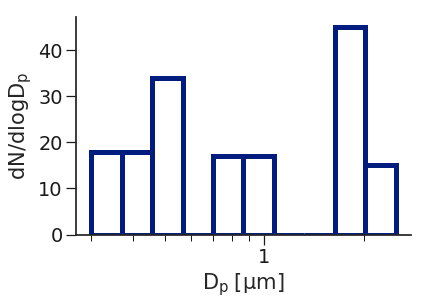

In [19]:
# Set the 10-bin OPC
opc = opcsim.OPC(wl=0.658, n_bins=10, dmin=0.3, dmax=2.5)

opc.calibrate("psl")

# Load the urban distribution
urban = opcsim.load_distribution("Urban")

# Plot
ax = opcsim.plots.histplot(opc.evaluate(urban), opc.bins)

ax.set_ylabel("$dN/dlogD_p$")

# Remove the spine
sns.despine()

Why don't we go ahead and overlay the distribution itself:

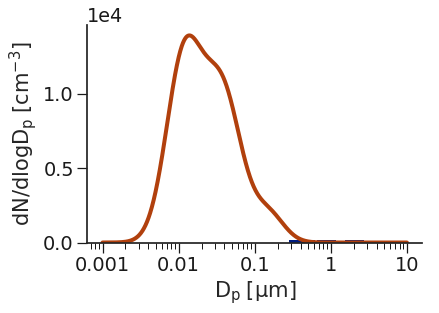

In [20]:
# Plot
ax = opcsim.plots.histplot(opc.evaluate(urban), opc.bins)

# Add the distribution to the plot
ax = opcsim.plots.pdfplot(urban, ax=ax)

sns.despine()

The above plots are in number-space. The primary use of these low-cost sensors is to estimate mass, so why don't we go ahead and plot this in volume space?

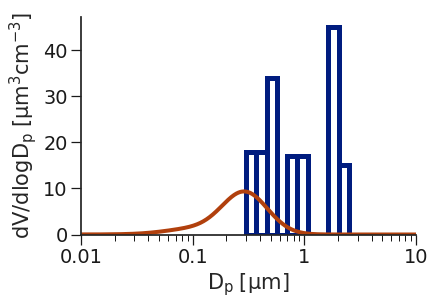

In [21]:
# Plot
ax = opcsim.plots.histplot(opc.evaluate(urban, weight='volume'), opc.bins)

# Add the distribution to the plot
ax = opcsim.plots.pdfplot(urban, weight='volume', ax=ax)

ax.set_xlim(0.01, 10)

sns.despine()

Each of these plots uses the `method='subint'` integration method. How does it change if we use the `simple` method instead?

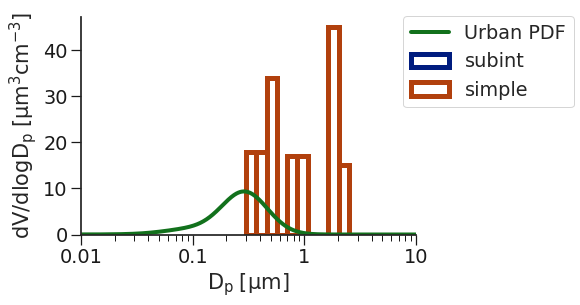

In [22]:
# Plot
ax = opcsim.plots.histplot(opc.evaluate(urban, weight='volume'), opc.bins)
ax = opcsim.plots.histplot(opc.evaluate(urban, weight='volume', method='simple'), opc.bins, ax=ax)

# Add the distribution to the plot
ax = opcsim.plots.pdfplot(urban, weight='volume', ax=ax)

# Add a legend and set limits
ax.legend(["Urban PDF", "subint", "simple"], bbox_to_anchor=(1.5, 1.05))
ax.set_xlim(0.01, 10)

sns.despine()

So it doesn't look too different from this picture, but it can have reasonable impacts. That should be a fairly in depth introduction to setting up, evaluating, and visualizing a simulated OPC.